[quick-start](https://jupysql.ploomber.io/en/latest/quick-start.html)
<br>记录大量企鹅特征数据

species|island|bill_length_mm|bill_depth_mm|flipper_length_mm|body_mass_g|sex
:---:|:---:|:---:|:---:|:---:|:---:|:---:
|物种/种类| 岛屿|嘴峰长度 (单位毫米) |嘴峰深度 (单位毫米) |鰭肢长度 (单位毫米) |体重 (单位克)|性别|记录年份
|character|character|double|double|integer|integer|character|integer|

<br>嘴峰长度, 简单的说就小鸟嘴巴的长度。 
<br>嘴峰深度, 简单的说小鸟嘴巴的上下厚度
<br>鰭肢长度, 简单的说企鹅翅膀的长度。

[数据来源](https://github.com/mwaskom/seaborn-data)

In [5]:
%%time

!pip install --upgrade pip --quiet
!pip install pandas jupysql duckdb-engine matplotlib --quiet

from pathlib import Path
from urllib.request import urlretrieve

#curr = Path()
#print(curr.as_uri, curr.absolute())
#f = Path("data/penguins.csv")
#print('isFile:',f.is_file(), f.absolute())

if not Path("data/penguins.csv").is_file():
    urlretrieve(
        "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv",
        "penguins.csv",
    )
else: 
    print('file existed!')

file existed!
CPU times: total: 0 ns
Wall time: 5.49 s


In [14]:
%load_ext sql
%sql duckdb://


%sql SELECT * FROM 'data/penguins.csv' LIMIT 3

Connecting to 'duckdb://'

Running query in 'duckdb://'

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
Adelie,Torgersen,39.1,18.7,181,3750,MALE
Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
Adelie,Torgersen,40.3,18.0,195,3250,FEMALE


In [15]:
%%sql
SELECT *
FROM 'data/penguins.csv'
WHERE bill_length_mm > 40
LIMIT 3

Running query in 'duckdb://'

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
Adelie,Torgersen,42.0,20.2,190,4250,None
Adelie,Torgersen,41.1,17.6,182,3200,FEMALE


In [16]:
result = %sql SELECT * FROM 'data/penguins.csv'
df = result.DataFrame()
print('head:')
df.head()


Running query in 'duckdb://'

head:


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,None
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [17]:
QUERY = """
SELECT * FROM 'data/penguins.csv' limit 5
"""

%sql {{QUERY}}

Running query in 'duckdb://'

species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
Adelie,Torgersen,39.1,18.7,181,3750,MALE
Adelie,Torgersen,39.5,17.4,186,3800,FEMALE
Adelie,Torgersen,40.3,18.0,195,3250,FEMALE
Adelie,Torgersen,None,None,None,None,None
Adelie,Torgersen,36.7,19.3,193,3450,FEMALE


In [24]:
%%sql
SELECT island, count(1)
FROM 'data/penguins.csv'
group by island
LIMIT 10

Running query in 'duckdb://'

island,count(1)
Dream,124
Torgersen,52
Biscoe,168


<Axes: title={'center': "'body_mass_g' from 'data/penguins.csv'"}, ylabel='body_mass_g'>

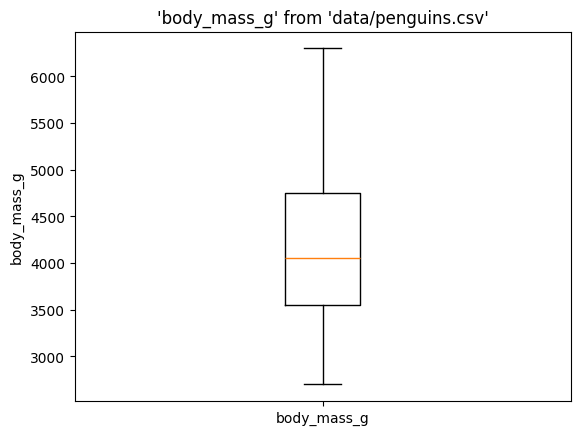

In [25]:
%sqlplot boxplot --table 'data/penguins.csv' --column body_mass_g
#按体重做箱形图(盒须图、盒式图或箱线图)
#先找出一组数据的上边缘、下边缘、中位数和两个四分位数；然后， 连接两个四分位数画出箱体；再将上边缘和下边缘与箱体相连接，中位数在箱体中间。

In [19]:
%%sql
SELECT island, COUNT(*)
FROM 'data/penguins.csv'
GROUP BY island
ORDER BY COUNT(*) DESC

Running query in 'duckdb://'

island,count_star()
Biscoe,168
Dream,124
Torgersen,52


In [20]:
%%sql --save biscoe --no-execute
SELECT *
FROM 'data/penguins.csv'
WHERE island = 'Biscoe'

Running query in 'duckdb://'

Skipping execution...

<Axes: title={'center': "'body_mass_g' from 'biscoe'"}, ylabel='body_mass_g'>

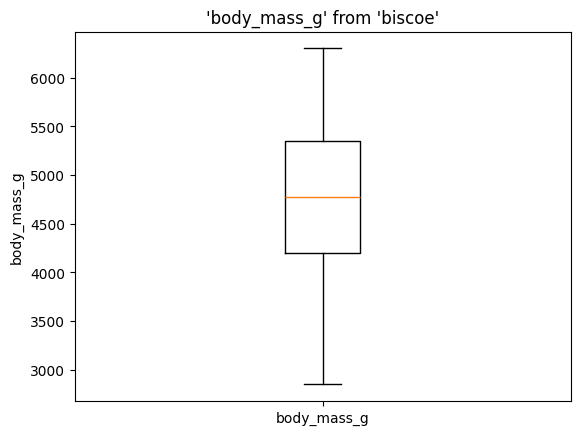

In [21]:
%sqlplot boxplot --table biscoe --column body_mass_g --with biscoe

<Axes: title={'center': "'body_mass_g' from 'data/penguins.csv'"}, xlabel='body_mass_g', ylabel='Count'>

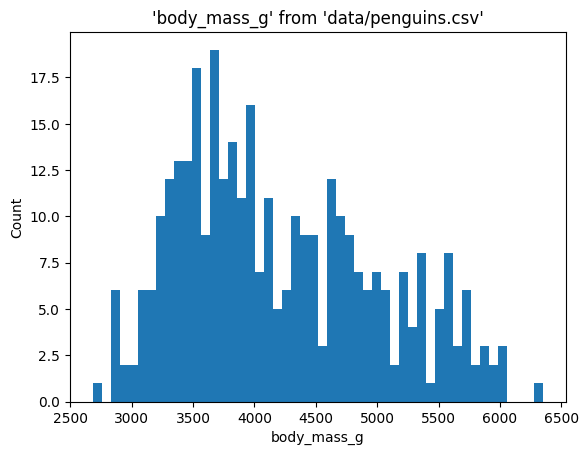

In [22]:
%sqlplot histogram --table 'data/penguins.csv' --column body_mass_g 

<Axes: title={'center': "'body_mass_g' from 'data/penguins.csv'"}, xlabel='body_mass_g', ylabel='Count'>

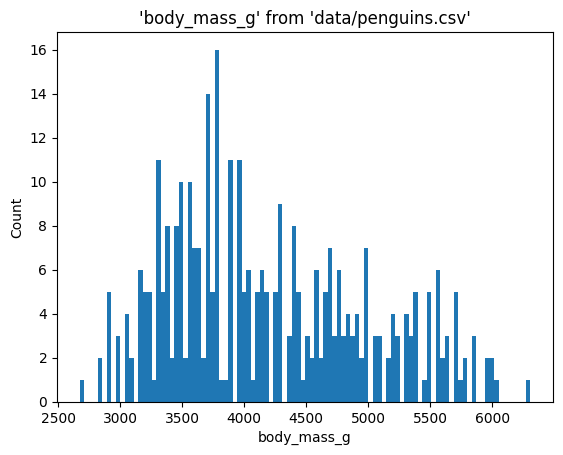

In [23]:
%sqlplot histogram --table 'data/penguins.csv' --column body_mass_g  --bins 100

In [31]:
%%sql --save not_nulls --no-execute
SELECT *
FROM 'data/penguins.csv'
WHERE bill_length_mm IS NOT NULL
AND bill_depth_mm IS NOT NULL

Running query in 'duckdb://'

Skipping execution...

<Axes: title={'center': "Boxplot from 'not_nulls'"}>

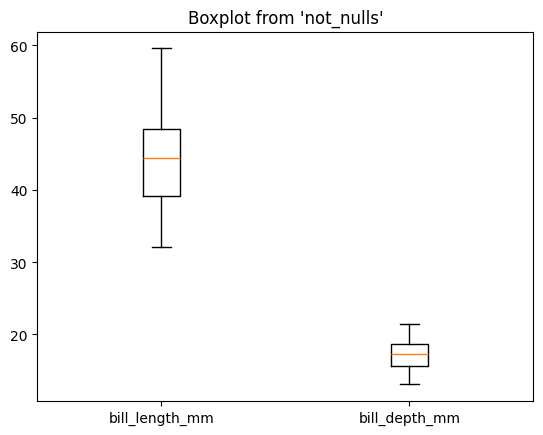

In [32]:
%sqlplot boxplot --column bill_length_mm bill_depth_mm --table not_nulls

<Axes: title={'center': "Histogram from 'not_nulls'"}, ylabel='Count'>

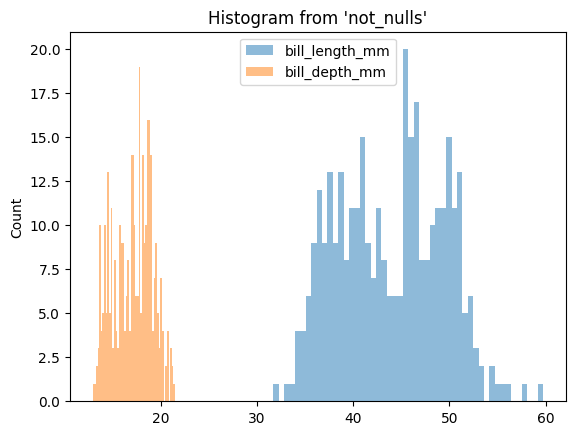

In [33]:
%sqlplot histogram --column bill_length_mm bill_depth_mm --table not_nulls

In [36]:
%%sql
CREATE TABLE penguins AS SELECT * FROM 'data/penguins.csv'

Running query in 'duckdb://'

Count


In [37]:
%%sql
SELECT species, COUNT(*) AS count
FROM penguins
GROUP BY species
ORDER BY count DESC

Running query in 'duckdb://'

species,count
Adelie,152
Gentoo,124
Chinstrap,68


In [40]:
%%sql species_count <<
SELECT species, COUNT(*) AS count
FROM penguins
GROUP BY species
ORDER BY count DESC

Running query in 'duckdb://'

d:\Programs\Python\Python311\Lib\site-packages\sql\run\resultset.py:373: UserWarning: .bar() is deprecated and will be removed in a future version. Use %sqlplot bar instead. For more help, find us at https://ploomber.io/community 
  warnings.warn(


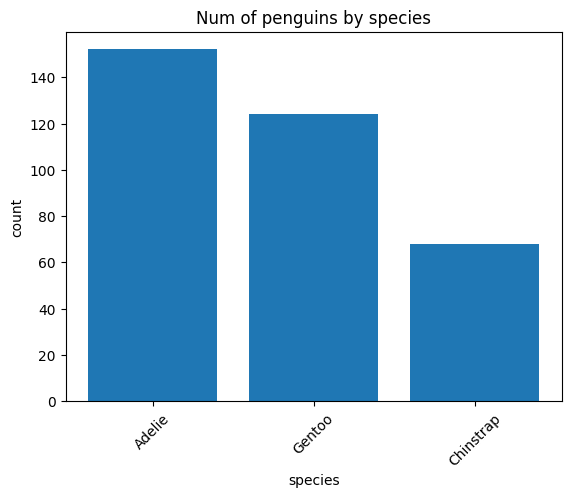

In [41]:
ax = species_count.bar()
# customize plot (this is a matplotlib Axes object)
_ = ax.set_title("Num of penguins by species")

In [42]:
%load_ext sql
%sql duckdb://

dynamic_limit = 5
dynamic_column = "island, sex"
%sql SELECT {{dynamic_column}} FROM 'data/penguins.csv' LIMIT {{dynamic_limit}}

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


Running query in 'duckdb://'

island,sex
Torgersen,MALE
Torgersen,FEMALE
Torgersen,FEMALE
Torgersen,None
Torgersen,FEMALE


In [43]:
%load_ext sql
%sql duckdb://

sex = ("MALE", "FEMALE")
islands = ["Torgersen", "Biscoe", "Dream"]

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [52]:
%%sql --save avg_body_mass
select 
    sex,
    {% for island in islands %}
    avg(case when island = '{{island}}' then body_mass_g end) as {{island}}_body_mass_g,
    {% endfor %}
from 'data/penguins.csv'
where sex in {{sex}}
group by sex

Running query in 'duckdb://'

sex,Torgersen_body_mass_g,Biscoe_body_mass_g,Dream_body_mass_g
MALE,4034.782608695652,5104.518072289156,3987.0967741935483
FEMALE,3395.8333333333335,4319.375,3446.311475409836


In [45]:
final = %sqlcmd snippets avg_body_mass
print(final)

select
    sex,

    avg(case when island = 'Torgersen' then body_mass_g end) as Torgersen_body_mass_g,

    avg(case when island = 'Biscoe' then body_mass_g end) as Biscoe_body_mass_g,

    avg(case when island = 'Dream' then body_mass_g end) as Dream_body_mass_g,

from 'data/penguins.csv'
where sex in ('MALE', 'FEMALE')
group by sex


In [51]:
%sql duckdb://
%sql select DATE '2011-12-09' + 1000 as newDate;

Running query in 'duckdb://'

newDate
2014-09-04
